## Ejercicio en Python: Usar e Interpretar una Matriz de Correlación para la Selección de Variables

A continuación, presentamos un ejercicio en Python para generar una matriz de correlación y usarla para eliminar campos redundantes en un problema de interpolación.


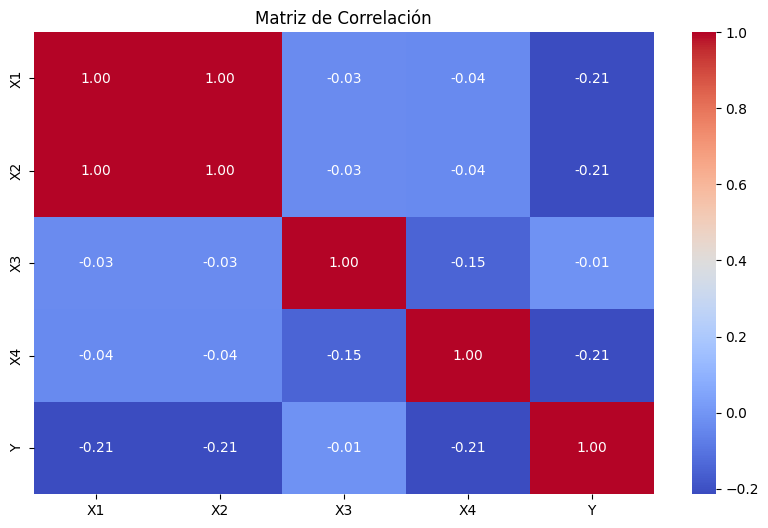

Variables altamente correlacionadas con otras: ['X1', 'X2']


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con variables correlacionadas
np.random.seed(42)
X1 = np.random.rand(100)
data = pd.DataFrame({
    'X1': X1,
    'X2': (X1 * 0.4) + 0.2,  # Alta correlación con X1
    'X3': np.random.rand(100),               # Variable independiente
    'X4': np.random.rand(100),               # Variable independiente
    'Y': np.random.rand(100)                 # Variable objetivo
})

# Calcular la matriz de correlación
corr_matrix = data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Identificar columnas con correlación alta (umbral = 0.8)
threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")

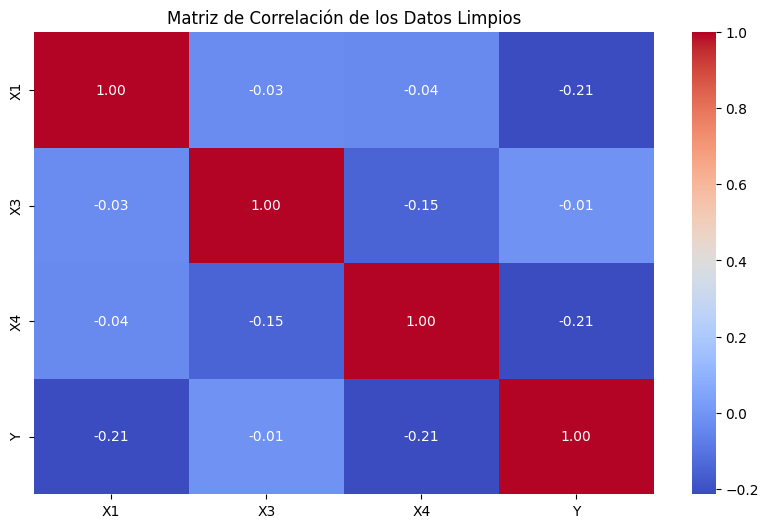

In [2]:
# Eliminar las columnas altamente correlacionadas (por ejemplo, X2)
data_cleaned = data.drop(columns=['X2'])

# Calcular la matriz de correlación de los datos limpios
corr_matrix = data_cleaned.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de los Datos Limpios')
plt.show()

In [3]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data_cleaned.drop(columns='Y')
y = data_cleaned['Y']

# Importar las bibliotecas necesarias para el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar un modelo de regresión lineal para interpolar
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

# Calcular el error porcentual
comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)


# Calcular el error cuadrático medio (MSE) para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

# Calcular el valor R²
r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")


Comparación de los primeros 10 valores entre el valor predicho y el valor real:
    Valor Real  Valor Predicho  Error Porcentual
0    0.877472        0.682570         22.211768
1    0.162934        0.474285       -191.089800
2    0.100778        0.375357       -272.458885
3    0.615850        0.386257         37.280748
4    0.398505        0.678837        -70.346029
5    0.097834        0.585074       -498.026309
6    0.660197        0.652517          1.163333
7    0.118165        0.347169       -193.800673
8    0.438971        0.598154        -36.262644
9    0.051682        0.512417       -891.486475

Error cuadrático medio (MSE) del modelo: 0.0984

Valor R² del modelo: 0.0474




## Explicación del Código

1. **Generación de Datos**: Creamos un DataFrame con 100 filas y 5 columnas (tres variables independientes **X1**, **X2**, **X3**, **X4** y una variable dependiente **Y**). La variable **X2** se genera para tener alta correlación con **X1**.

2. **Cálculo de la Matriz de Correlación**: Usamos el método `corr()` de pandas para generar la matriz de correlación, lo que nos permite ver las relaciones entre todas las variables.

3. **Visualización de la Matriz**: Se visualiza la matriz de correlación usando un mapa de calor (**heatmap**) de Seaborn, lo que facilita la interpretación de las relaciones entre variables.

4. **Selección de Variables**: Identificamos las variables que están altamente correlacionadas (umbral > 0.8) y eliminamos una de ellas (en este caso, **X2**) para evitar la multicolinealidad, lo que podría afectar negativamente la precisión del modelo.

5. **Interpolación**: Aplicamos un modelo de **regresión lineal** para interpolar la variable **Y** en función de las variables restantes después de eliminar las redundantes. Evaluamos el modelo utilizando el **error cuadrático medio (MSE)** y el **coeficiente de determinación $R^2$**.

6. **Evaluación del Modelo**: 
   - **Error Cuadrático Medio (MSE)**: Mide el promedio de los errores al cuadrado entre los valores predichos y los reales. Un valor más bajo indica un mejor ajuste del modelo.
   - **Coeficiente de Determinación $R^2$**: Este valor indica qué proporción de la varianza en la variable dependiente se puede explicar por las variables independientes. 
     - Un $R^2$ cercano a 1 sugiere que el modelo explica bien los datos, mientras que un valor cercano a 0 indica que el modelo no explica la varianza. 
     - Un $R^2$ negativo sugiere que el modelo es peor que simplemente usar la media de los datos como predicción.



El uso de una **matriz de correlación** es crucial en ciencia de datos para identificar relaciones entre variables. Nos permite detectar multicolinealidad, lo que nos ayuda a reducir la dimensionalidad del conjunto de datos y mejorar el rendimiento de los modelos. En el ejercicio, eliminamos las variables correlacionadas para evitar redundancias en el modelo y, finalmente, aplicamos interpolación usando regresión lineal.


---

## Ejercicio en Python: Uso de una Matriz de Correlación para la Selección de Variables en un Sistema Lineal

En el contexto de la ciencia de datos, la **selección de variables** es una tarea esencial para optimizar el rendimiento de los modelos predictivos y evitar redundancias. 
Cuando tratamos con sistemas lineales, es crucial identificar variables que están altamente correlacionadas entre sí, ya que esto podría llevar a **multicolinealidad**, una situación en la que dos o más variables independientes están fuertemente correlacionadas, lo que puede distorsionar los resultados de los modelos lineales.

En este ejercicio, utilizaremos una **matriz de correlación** para detectar y eliminar variables redundantes en un conjunto de datos. Esto nos ayudará a simplificar el modelo, reduciendo el riesgo de sobreajuste y mejorando la interpretabilidad.


In [ ]:
# 1. Importar Librerías Necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Crear un DataFrame de Ejemplo con Variables Correlacionadas

# Generamos un conjunto de datos con **variables altamente correlacionadas** 
# para demostrar cómo una matriz de correlación puede ayudar a identificar esas relaciones.

np.random.seed(42)
X1 = np.random.rand(100)
X2 = (X1 * 0.4) + 0.2
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,  # Alta correlación con X1
    'X3': (X1 + X2)*np.random.normal(0, 1, 100),  # Relación con X1 y X2
    'X4': np.random.rand(100) + np.random.normal(0, 1, 100),  # Variable independiente
    'X5': np.random.rand(100) + np.random.normal(0, 1, 100),  # Variable independiente
    'X6': np.random.rand(100) + np.random.normal(0, 1, 100),  # Variable independiente
    'Y': np.random.normal(0, 1, 100)    # Variable objetivo
})

# 3. Calcular la Matriz de Correlación

# La **matriz de correlación** nos muestra el grado de relación lineal entre las variables, 
# donde 1 indica una correlación perfecta y 0 significa que no hay correlación.

corr_matrix = data.corr()


# 4. Visualizar la Matriz de Correlación

# Usamos `seaborn` para generar una visualización gráfica de la matriz de correlación. 
# Las zonas más oscuras indican una mayor correlación.

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# 5. Identificar Columnas con Correlación Alta

# Definimos un **umbral de correlación** de 0.8 para identificar variables que están 
# fuertemente correlacionadas y, por lo tanto, pueden ser redundantes.


threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")

In [ ]:
# 6. Eliminar Variables Redundantes

# Eliminamos las variables que están altamente correlacionadas, como `X2`, 
# ya que no aporta información adicional al modelo que `X1` no proporcione.

data_cleaned = data.drop(columns=['X2'])

# 7. Visualizar la Nueva Matriz de Correlación

# Volvemos a calcular y visualizar la **matriz de correlación** tras eliminar 
# las variables redundantes.

corr_matrix = data_cleaned.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de los Datos Limpios')
plt.show()

In [ ]:
# 8. Dividir los Datos en Entrenamiento y Prueba

# Dividimos los datos en conjuntos de **entrenamiento y prueba** para evaluar 
# el modelo de regresión lineal.

X = data_cleaned.drop(columns='Y')
y = data_cleaned['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 9. Aplicar un Modelo de Regresión Lineal

# Entrenamos un **modelo de regresión lineal** usando los datos de entrenamiento.

model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = model.predict(X_test)

# 10. Comparar Valores Predichos vs Reales

# Comparamos los primeros 10 valores predichos con los valores reales y calculamos 
# el **error porcentual**.

comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

# 11. Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para evaluar 
# el rendimiento del modelo.


mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")

Este ejercicio demuestra la importancia de usar una **matriz de correlación** en sistemas lineales para detectar variables redundantes, lo cual permite simplificar el modelo, reducir la multicolinealidad y mejorar la eficiencia computacional y la interpretabilidad. Este enfoque es esencial en el contexto de la ciencia de datos para garantizar la calidad del análisis y la fiabilidad de los modelos predictivos.

---

## Ejercicio en Python: Uso de una Matriz de Correlación para la Selección de Variables en un Sistema No Lineal

En el contexto de la ciencia de datos, la **selección de variables** sigue siendo crucial cuando trabajamos con sistemas no lineales. Aunque la matriz de correlación es más comúnmente usada para sistemas lineales, también puede ser útil en sistemas no lineales para eliminar variables redundantes que afecten el rendimiento de un modelo, como la **regresión polinómica**. En este ejercicio, aplicaremos un modelo de regresión polinómica en lugar de un modelo lineal para capturar las relaciones no lineales entre las variables.


In [ ]:
# 1. Importar Librerías Necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 2. Crear un DataFrame de Ejemplo con Variables Correlacionadas

# Generamos un conjunto de datos donde las relaciones entre las variables pueden no ser estrictamente lineales.

np.random.seed(42)
X1 = np.random.rand(100)
X2 = (X1 ** 2) + 0.1 * np.random.rand(100)
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,  # Relación no lineal con X1
    'X3': np.random.rand(100),  # Variable independiente
    'X4': np.random.rand(100),  # Variable independiente
    'X5': (2*X1) + 5, # Alta correlación con X1
    'X6': np.random.rand(100),  # Variable independiente
    'Y': (2*X1**2 + 3*X2**2) + np.random.normal(0, 1, 100)  # Relación no lineal con X1 y X2
})

# 3. Calcular la Matriz de Correlación

# Aunque estamos trabajando con relaciones no lineales, la matriz de correlación puede ofrecer 
# algunas pistas iniciales sobre la redundancia entre variables. Sin embargo, la correlación lineal 
# podría no ser suficiente para capturar todas las dependencias en sistemas no lineales.

corr_matrix = data.corr()


### # 4. Visualizar la Matriz de Correlación

# Usamos `seaborn` para visualizar la matriz de correlación, recordando que las relaciones no lineales 
# no siempre se reflejan completamente en una matriz de correlación lineal.


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


# 5. Identificar Columnas con Correlación Alta

# Definimos un umbral de correlación para identificar posibles variables correlacionadas de manera lineal. 
# Aunque no todas las relaciones no lineales aparecerán aquí, es útil reducir la multicolinealidad lineal.


threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)
        
print(f"Variables altamente correlacionadas con otras: {to_drop}")

In [ ]:
# 6. Eliminar Variables Redundantes

# Eliminamos las variables que están altamente correlacionadas, como `X5`, 
# ya que no aporta información adicional al modelo que `X1` no proporcione.

data_cleaned = data.drop(columns=['X5'])


### # 7. Visualizar la Nueva Matriz de Correlación

# Volvemos a calcular la matriz de correlación de los datos limpios, eliminando las variables redundantes.

corr_matrix = data_cleaned.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de los Datos Limpios')
plt.show()

In [ ]:
# 8. Aplicar Regresión Polinómica

# Dividimos los datos en **entrenamiento y prueba** y luego aplicamos un **modelo de regresión polinómica** para 
# capturar la relación no lineal entre las variables. En este caso, generamos características polinómicas de grado 2.

X = data_cleaned.drop(columns='Y')
y = data_cleaned['Y']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Aplicar regresión lineal a los términos polinómicos
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 9. Predecir y Evaluar el Modelo

# Utilizamos el modelo polinómico para predecir los valores y luego evaluamos su rendimiento.

y_pred = model.predict(X_test_poly)

# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)

### # 10. Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para medir la calidad del ajuste 
# de la regresión polinómica.

mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")


En este ejercicio, utilizamos una **regresión polinómica** para capturar las relaciones no lineales en los datos. Aunque la matriz de correlación es útil para detectar multicolinealidad lineal, en sistemas no lineales es importante considerar métodos adicionales como la **regresión polinómica** o modelos más avanzados para capturar la verdadera naturaleza de las relaciones entre variables. Este enfoque es fundamental en ciencia de datos para modelos no lineales y mejora significativamente la precisión predictiva cuando las relaciones entre las variables no son lineales.


In [ ]:
---

## Ejercicio en Python: Uso de una Matriz de Correlación para la Selección de Variables en un Sistema No Lineal con Funciones de Base Radial

En este ejercicio, vamos a trabajar con un sistema no lineal utilizando **regresión con funciones de base radial (RBF)**. Esta técnica se basa en el uso de funciones no lineales para modelar la relación entre las variables, siendo útil en contextos donde las relaciones entre las variables no pueden ser capturadas adecuadamente por modelos polinómicos o lineales. Aunque el enfoque de **matriz de correlación** sigue siendo útil para eliminar variables redundantes, en sistemas no lineales complejos es necesario usar técnicas avanzadas como RBF para obtener un mejor ajuste.


In [ ]:
# 1. Importar Librerías Necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge

# 2. Crear un DataFrame de Ejemplo con Variables Correlacionadas

# Generamos un conjunto de datos con relaciones no lineales que se modelarán usando funciones de base radial.

np.random.seed(42)
X1 = np.random.rand(100)
X2 = np.sin(X1 * 2 * np.pi)**2 +  np.random.rand(100)
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,  # Relación no lineal con X1
    'X3': X1*X2**2, # Relación no lineal con X1 y X2
    'X4': X1 + np.sin(X1),  # Relación con X1
    'X5': np.random.rand(100),  # Variable independiente
    'X6': np.random.rand(100),  # Variable independiente
    'Y': np.sin(X1 * 2 * np.pi)**2 + np.cos(X2 * 2 * np.pi) + X1*X2  # Relación no lineal con X1 y X2
})

# 3. Calcular la Matriz de Correlación

# Aunque trabajamos con relaciones no lineales, calculamos una matriz de correlación para identificar cualquier 
# redundancia entre las variables que podrían ser eliminadas.


corr_matrix = data.corr()


# 4. Visualizar la Matriz de Correlación

# Visualizamos la matriz de correlación para tener una idea de las dependencias lineales.


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


# 5. Identificar y Eliminar Variables Redundantes

# Definimos un umbral de correlación y eliminamos variables redundantes, aunque en este caso podrían 
# no reflejar todas las relaciones no lineales.


threshold = 0.8
to_drop = []
for column in corr_matrix.columns:
    if any((corr_matrix[column].abs() > threshold) & (corr_matrix.index != column)):
        to_drop.append(column)

print(f"Variables altamente correlacionadas con otras: {to_drop}")

In [ ]:
# 6. Eliminar Variables Redundantes

# Eliminamos las variables que están altamente correlacionadas, como `X4`, 
# ya que no aporta información adicional al modelo que `X1` no proporcione.

data_cleaned = data.drop(columns=['X4'])

# 7. Visualizar la Nueva Matriz de Correlación

# Visualizamos la nueva matriz de correlación después de limpiar las variables redundantes.

corr_matrix = data_cleaned.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de los Datos Limpios')
plt.show()

In [ ]:
# 8. Aplicar Regresión con Funciones de Base Radial (RBF)

# Dividimos los datos en **entrenamiento y prueba** y luego aplicamos un modelo de regresión con 
# funciones de base radial para capturar las relaciones no lineales.

X = data_cleaned.drop(columns='Y')
y = data_cleaned['Y']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar Kernel Ridge con RBF como kernel
model = KernelRidge(kernel='rbf', alpha=1.0, gamma=1.0)
model.fit(X_train, y_train)

# 9. Predecir y Evaluar el Modelo

# Utilizamos el modelo para predecir los valores de prueba y evaluar su rendimiento.

y_pred = model.predict(X_test)

# Comparar los primeros 10 valores entre el valor predicho y el valor real
comparison_df = pd.DataFrame({
    'Valor Real': y_test.head(10).values,
    'Valor Predicho': y_pred[:10]
})

comparison_df['Error Porcentual'] = ((comparison_df['Valor Real'] - comparison_df['Valor Predicho']) / comparison_df['Valor Real']) * 100

print("\nComparación de los primeros 10 valores entre el valor predicho y el valor real:\n", comparison_df)


# 10. Evaluar el Modelo

# Calculamos el **error cuadrático medio (MSE)** y el valor **R²** para medir la precisión del ajuste.

mse = mean_squared_error(y_test, y_pred)
print(f"\nError cuadrático medio (MSE) del modelo: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"\nValor R² del modelo: {r2:.4f}")


En este ejercicio, utilizamos **regresión con funciones de base radial (RBF)** para modelar las relaciones no lineales en el conjunto de datos. La regresión RBF es especialmente útil cuando las relaciones entre las variables no pueden ser capturadas adecuadamente por modelos lineales o polinomiales. Aunque la matriz de correlación nos ayuda a identificar y eliminar redundancias lineales, la verdadera complejidad de un sistema no lineal requiere modelos avanzados como el RBF para capturar con precisión la dinámica subyacente.
